Regressions on Fertility Data Implemented Using Scikit-Learn

Preprocessing data

In [2]:
with open('fertility.txt') as fertility:
    patients = []
    classification = []
    for line in fertility:
        data = line.split()
        for i in data:
            ndata = i.split(',')
            patients += [ndata]
    for p in range(len(patients)):
        classification += patients[p][-1]
        patients[p] = patients[p][:-1]
    for j in patients:
        for k in range(len(j)):
            j[k] = float(j[k])
    for l in range(len(classification)):
        if classification[l] == 'N':
            classification[l] = 0
        else:
            classification[l] = 1
    patientstrim = []
    for m in patients:
        patientstrim += [[m[1],m[6],m[8]]]

Imports

In [3]:
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

Linear Regression:

Creating the Regression

In [4]:
train_x_list, test_x_list, train_y_list, test_y_list = train_test_split(patientstrim, classification, test_size=0.2)
x_train = np.array(train_x_list)
y_train = np.array(train_y_list)
x_test = np.array(test_x_list)
y_test = np.array(test_y_list)
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print(f"Coefficients of regression: {reg.coef_}")

Coefficients of regression: [ 0.3483219  -0.28253401  0.0891611 ]


Vizualizing the Regression

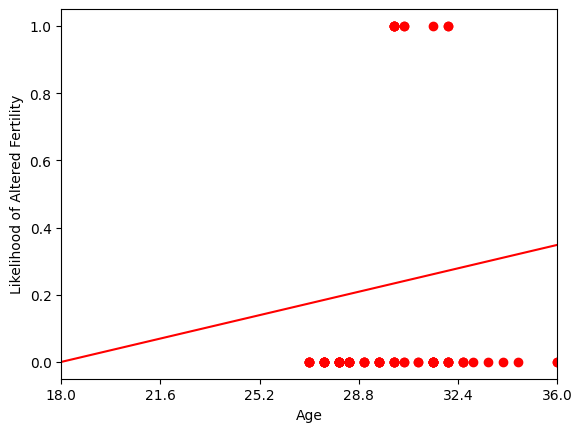

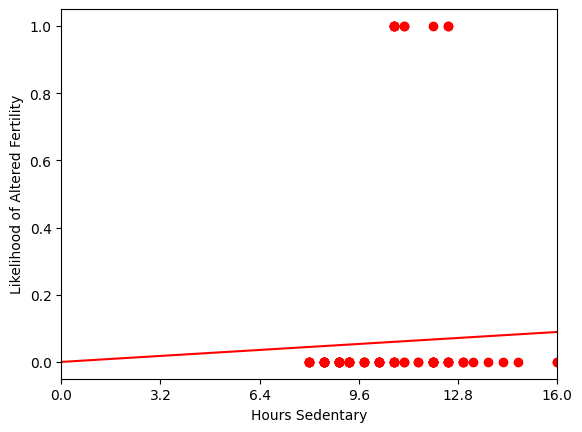

In [5]:
def getxvalues(lst,attribute):
    nlst = []
    for i in lst:
        nlst += [i[attribute]]
    return nlst

age = getxvalues(x_train,0)
alcohol_consumption = getxvalues(x_train, 1)
hours_sed = getxvalues(x_train,2)

plt.plot(age,y_train,'ro')
plt.xlabel("Age")
plt.ylabel("Likelihood of Altered Fertility")
plt.xlim([0,1])
locs, labels = plt.xticks()
labels = [(round(18+item*18,2)) for item in locs]
plt.xticks(locs,labels)
age_line_x = np.linspace(0,1,100)
age_line_y = reg.coef_[0]*age_line_x
plt.plot(age_line_x,age_line_y,'-r')
plt.show()

plt.plot(age,y_train,'ro')
plt.xlabel("Hours Sedentary")
plt.ylabel("Likelihood of Altered Fertility")
plt.xlim([0,1])
locs, labels = plt.xticks()
labels = [round((item*16),2) for item in locs]
plt.xticks(locs,labels)
hours_sed_line_x = np.linspace(0,1,100)
hours_sed_line_y = reg.coef_[2]*hours_sed_line_x
plt.plot(hours_sed_line_x,hours_sed_line_y,'-r')
plt.show()

Model Performance

In [6]:
scores = cross_val_score(reg,x_train,y_train, cv=4, scoring='r2')
print(f"Cross validation R2 score: {scores}")
sum = 0
for i in scores:
    sum += i
average_score = sum/len(scores)
print(f"Average: {average_score}")

Cross validation R2 score: [ 0.01547925 -0.02318554 -0.10985284 -0.09304227]
Average: -0.05265034944720007


Prediction

In [7]:
test_predict = reg.predict(x_test)
for i in range(len(y_test)):
    print(f"Prediction for {x_test[i]} is {test_predict[i]} while actual result is {y_test[i]}")

Prediction for [0.92 1.   0.63] is 0.18729725668175937 while actual result is 0
Prediction for [0.69 0.6  0.19] is 0.18096593870657884 while actual result is 0
Prediction for [0.5  0.8  0.88] is 0.11979913649140636 while actual result is 1
Prediction for [0.61 1.   0.63] is 0.07931746897882178 while actual result is 0
Prediction for [0.56 1.   0.63] is 0.06190137418802542 while actual result is 0
Prediction for [0.67 0.8  0.19] is 0.11749269974914452 while actual result is 0
Prediction for [0.81 0.8  0.38] is 0.18319837417190224 while actual result is 0
Prediction for [0.75 0.8  0.38] is 0.16229906042294656 while actual result is 0
Prediction for [0.69 1.   0.31] is 0.07865166862973327 while actual result is 0
Prediction for [0.67 1.   0.5 ] is 0.0886258397219426 while actual result is 0
Prediction for [0.94 0.8  0.31] is 0.222238943624831 while actual result is 1
Prediction for [0.53 0.8  0.63] is 0.10795851835466336 while actual result is 0
Prediction for [0.94 0.2  0.25] is 0.386409

Decision Tree:

Creating the Regression

In [8]:
train_x_list, test_x_list, train_y_list, test_y_list = train_test_split(patientstrim, classification, test_size=0.2)
x_train = np.array(train_x_list)
y_train = np.array(train_y_list)
x_test = np.array(test_x_list)
y_test = np.array(test_y_list)
clf = tree.DecisionTreeRegressor(max_depth=4)
clf = clf.fit(x_train,y_train)

Vizualizing the Regression

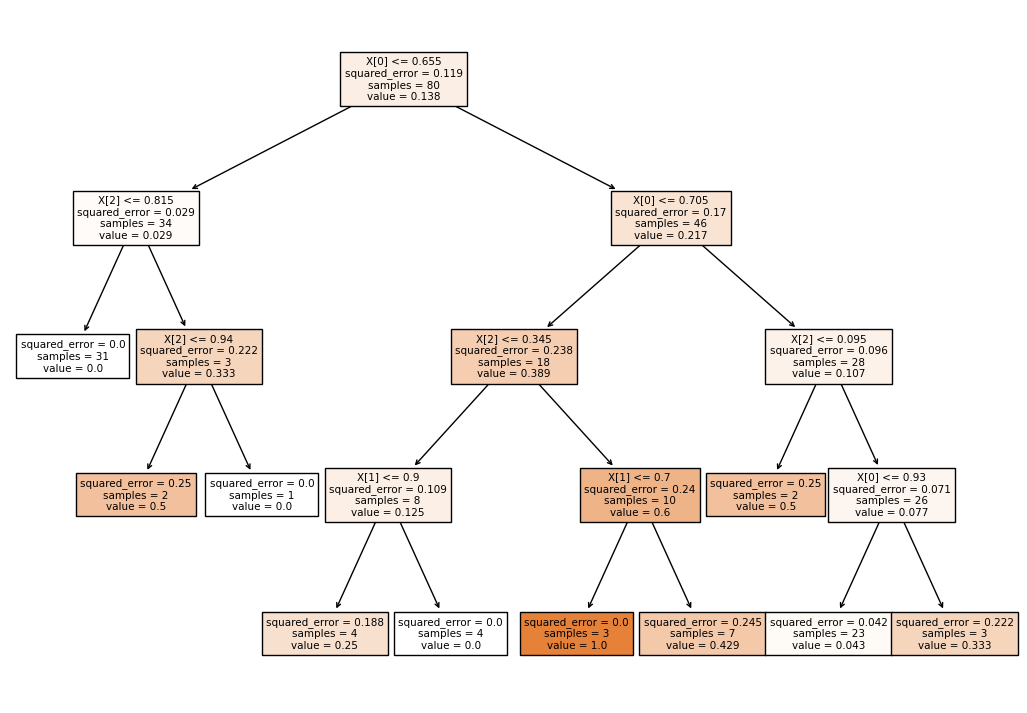

In [9]:
fig = plt.figure(figsize=(13,9))
viz = tree.plot_tree(clf,filled=True)
plt.show()

Model Perfromance

In [10]:
scores = cross_val_score(clf,x_train,y_train, cv=4, scoring='r2')
print(f"Cross validation R2 score: {scores}")
sum = 0
for i in scores:
    sum += i
average_score = sum/len(scores)
print(f"Average: {average_score}")

Cross validation R2 score: [-2.27306361 -0.20659722 -0.33333333 -1.99311241]
Average: -1.2015266444053254


Prediction

In [11]:
test_predict = clf.predict(x_test)
for i in range(len(y_test)):
    print(f"Prediction for {x_test[i]} is {test_predict[i]} while actual result is {y_test[i]}")

Prediction for [0.56 0.4  0.63] is 0.0 while actual result is 0
Prediction for [0.69 1.   0.75] is 0.42857142857142855 while actual result is 0
Prediction for [0.56 1.   0.44] is 0.0 while actual result is 0
Prediction for [0.64 1.   0.63] is 0.0 while actual result is 0
Prediction for [0.75 0.6  0.19] is 0.043478260869565216 while actual result is 0
Prediction for [0.94 0.2  0.25] is 0.3333333333333333 while actual result is 0
Prediction for [0.53 1.   0.75] is 0.0 while actual result is 0
Prediction for [0.58 1.   0.19] is 0.0 while actual result is 0
Prediction for [0.81 0.8  0.38] is 0.043478260869565216 while actual result is 0
Prediction for [0.67 0.8  0.25] is 0.25 while actual result is 0
Prediction for [0.64 1.   0.38] is 0.0 while actual result is 0
Prediction for [0.56 1.   0.63] is 0.0 while actual result is 0
Prediction for [0.78 1.   0.25] is 0.043478260869565216 while actual result is 0
Prediction for [0.56 0.6  0.5 ] is 0.0 while actual result is 0
Prediction for [0.61 